# Notebook 2: Second-Level Analysis

In the last notebook, we performed a first level analysis by using data from a single subject. In this notebook, we will now do a second-level analysis using up to $94$ subjects. If you are unsure what the difference is between a first and second level analysis, please read the [First-Level vs Second-Level Analysis](./nb_01_fmri_data_and_first_level_analysis.ipynb#First-Level-vs-Second-Level-Analysis) section of the notebook `01`.



### Table of Contents

 - [Notebook 0: Introduction](./nb_00_introduction.ipynb)
 - [Notebook 1: FMRI Data and First-Level Analysis](./nb_01_fmri_data_and_first_level_analysis.ipynb)
 - [**Notebook 2: Second-Level Analysis**](./nb_02_second_level_analysis.ipynb)
   - [Getting Started](#Getting-Started)
     - [Loading the Data](#Loading-the-Data)
     - [MNI Space](#MNI-Space)
     - [Glass Brain Plots and Displaying the Subject $t$-statistic Maps](#Glass-Brain-Plots-and-Displaying-the-Subject-$t$-statistic-Maps)
   - [Second-Level Analysis: An Example](#Second-Level-Analysis:-An-Example)
     - [Building $X$ and Fitting the Model](#Building-$X$-and-Fitting-the-Model)
     - [Parametric Inference](#Parametric-Inference)
     - [Non-Parametric Inference](#Non-Parametric-Inference)

## Getting Started

Let's begin by loading some relevant modules! If you did the previous notebooks and the `Introduction to Python` course, this should be feeling fairly familiar to you at this point. If not, feel free to ask one of the tutors what is going on here!

In [1]:
%matplotlib inline
import nilearn
import nibabel as nib
import os
import matplotlib.pyplot as plt
import pandas as pd

### Loading the Data

To begin, we will work with a dataset drawn from the ['Brainomics/Localizer' database](Brainomics/Localizer database), which investigated several different brain areas and stimuli (see [here](https://nilearn.github.io/modules/generated/nilearn.datasets.fetch_localizer_contrasts.html) for more details).

For now, we'll focus on a task where subjects had to alternately press a button with their left and and their right hands. Let's download some data!

In [2]:
from nilearn.datasets import fetch_localizer_contrasts
n_subjects = 16
data = fetch_localizer_contrasts(["left vs right button press"], n_subjects,
                                 get_tmaps=True)


Dataset created in /Users/cdtadmin/nilearn_data/brainomics_localizer



 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)
/Users/cdtadmin/Documents/Imaging/Nilearn2022/nilearn/lib/python3.9/site-packages/nilearn/datasets/func.py:764: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)


So we've just downloaded 16 $t$-statistic images, each of which was generated from a first-level analysis for a different subject. For each subject, the task and analysis conducted was identical, and now we wish to combine the subject-level results to get a single meaningful result which represents the group's response.



### Previous Analysis and Registration to MNI Space

Before we get started, it is worth emphasizing that this data has undergone several previous stages of analysis. These included:

- **Motion correction**: This step accounted for subjects moving their head.
- **Regstration**: This step "warped" each subject's 4D data to standard atlas space
- **First level model fitting**: At the first level effect size (i.e. $L\beta^v$) and $T$-maps have already been produced.

The second step in the above is new to us, and was not performed in the previous notebook. The results have been ["registered"](./nb_01_fmri_data_and_first_level_analysis.ipynb#Preprocessing) to MNI space. This means that all of the images have been transformed into a standard shape size and orientation known as MNI152 (You can read a bit more about this [here](https://www.lead-dbs.org/about-the-mni-spaces/)). 

For reference, you can have a look at the standard MNI152 template below.

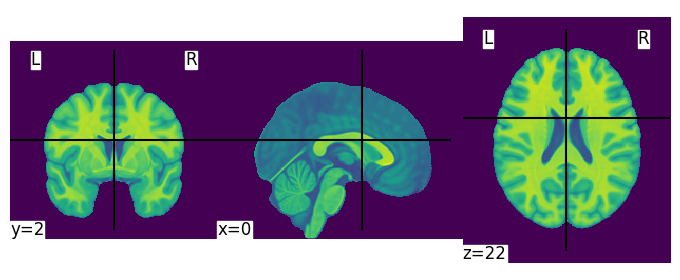

In [3]:
from nilearn import image, plotting
from nilearn.datasets import MNI152_FILE_PATH
smooth_anat_img = image.smooth_img(MNI152_FILE_PATH, fwhm=3)

# While we are giving a file name as input, the function returns
# an in-memory object:
plotting.plot_img(MNI152_FILE_PATH)

### Glass Brain Plots and Displaying the Subject $t$-statistic Maps

Now, let's have a look at our data! In the last notebook we were looking at volumes on a slice-by-slice basis. Here, we will take a slightly different approach and visualize our images as "glass brain plots". A glass brain plot is a nice way of visualizing all slices of a thresholded image laid on top of one another, and can be made using the `plot_glass_brain` function in nilearn. Try the below example!

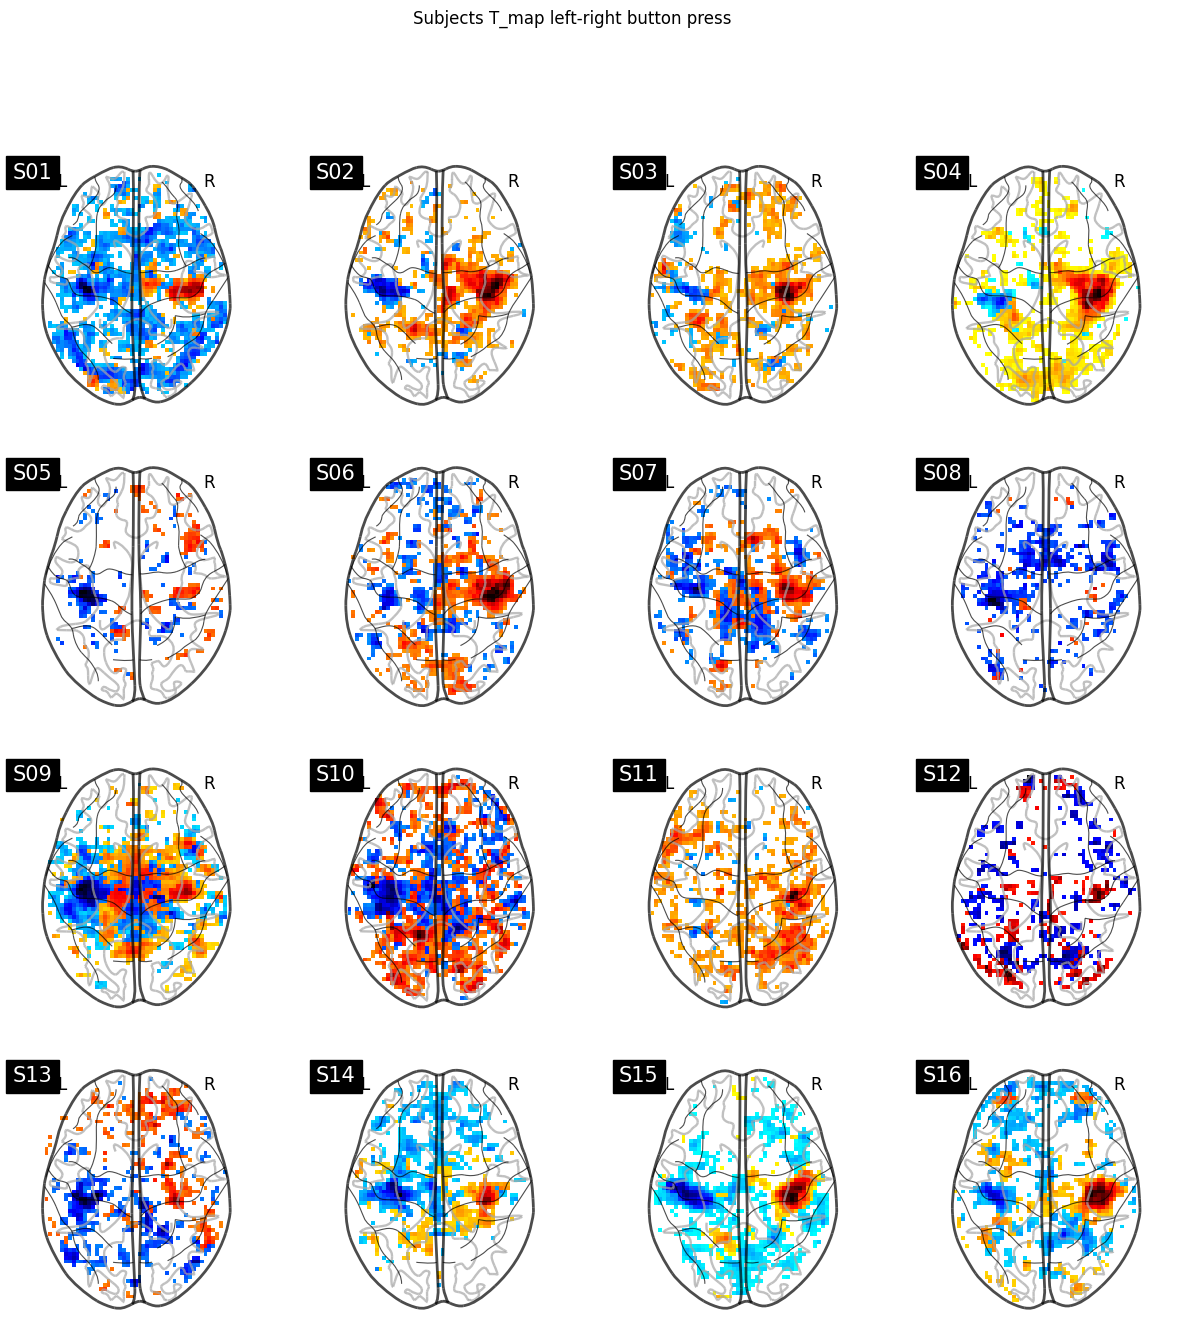

In [4]:
from nilearn import plotting

# Get the subject data
subjects = [subject_data[0] for subject_data in data['ext_vars']]

# Set up a new figure with subplots
fig, axes = plt.subplots(nrows=4, ncols=4,figsize=(15,15))

# Loop through the T-statistic images, theshold each one and plot it.
for cidx, tmap in enumerate(data['tmaps']):
    plotting.plot_glass_brain(tmap, colorbar=False, threshold=2.0,
                              title=subjects[cidx],
                              axes=axes[int(cidx / 4), int(cidx % 4)],
                              plot_abs=False, display_mode='z')
fig.suptitle('Subjects T_map left-right button press')
plt.show()

In the above, we have one glass-brain plot per subject! As you can see it seems like there's a large amount of variation between subjects! In the next section, we will see if we can get anything meaninful out of the group activation.

## Second-Level Analysis: An Example

So far we've downloaded the images from $16$ first-level analyses. Now, let's have a look at how we can combine these at the second-level using `nilearn`!

### Building $X$ and Fitting the Model

For these subjects we simply want to find the average difference between the left and right button press. That is, we simply want to submit the contrast data to a one-sample $t$-test. 

Building the design matrix for the one-sample $t$-test analysis is fairly straightforward. We want to test the group average effect, so all we need in our model is an intercept. If you're not sure why the design matrix in this case is a column of ones, feel free to ask one of the tutors and we will happy go over this for you! 

In [5]:
# The design matrix this time only contains an intercept
design_matrix = pd.DataFrame([1] * n_subjects,
                             columns=['intercept'])

Let's have a look at the design matrix!

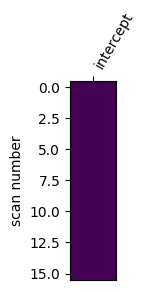

In [6]:
from nilearn.plotting import plot_design_matrix

# Create design matrix plot
plot_design_matrix(design_matrix)

# Show the plot
plt.show()

This is much simpler than the design matrix we had in the first-level model! 

Okay, we are now ready to create a `SecondLevelModel` object. As with the `FirstLevelModel` in the previous notebook, we must first create the object, and then pass it the data.

In [7]:
from nilearn.glm.second_level import SecondLevelModel
second_level_model = SecondLevelModel(smoothing_fwhm=8.0)

Unlike for the `FirstLevelModel`, we don't really have to specify all that much when we initialize the `SecondLevelModel`. 

Back in the [previous notebook](./nb_01_fmri_data_and_first_level_analysis.ipynb#Building-$X$-and-Fitting-the-Model), when we initialized the `FirstLevelModel` we had to set a load of parameters (e.g. `t_r`, `noise_model`, `standardize`, `hrf_model`, `drift_model`, `high_pass`) but most of these were to do with how we were modelling the behaviour *across time* (this is the answer to Question 3 of the previous notebook). 

In a second-level analysis, we are no longer dealing with timeseries and, as a result, things become a lot simpler!

We are now ready to give the model our imaging data (the $L\beta^v$ maps which were generated in the first level analyses) and our design matrix. Exactly as we did with our `FirstLevelModel` we can now fit the data!

In [8]:
second_level_model = second_level_model.fit(data['cmaps'],
                                            design_matrix=design_matrix)

And, by using `compute_contrast`, we can generate all the same images we were able to before! Let's quickly make a $Z$-map!

In [9]:
# Our contrast is very simple!
L = [1]

# Let's make our Z map!
z_map = second_level_model.compute_contrast(L, output_type='z_score')

Note that, because our design matrix only contains one column, our parameter vector $\beta$ only contains one element. As a result, the contrast vector $L$ contains just a single element as well; $L=[1]$. This is much simpler than what we had to do for the first-level analysis!

In fact, our model is so much simpler that nilearn can guess what contrast vector we need (i.e. it can guess out that we probably want to use $L=[1]$)! As a result we can rerun the code above without $L$ and nilearn will still do the same thing! Let's try this!

In [10]:
# Let's make our Z map!
z_map = second_level_model.compute_contrast(output_type='z_score')

### Parametric Inference

So we now have our unthresholded $Z$-map; let's try thresholding it using some methods we met in the [previous notebook](./nb_01_fmri_data_and_first_level_analysis.ipynb#Thresholding-your-Results). First, let's look at an uncorrected threshold.

Uncorrected p<0.05 threshold: 1.960


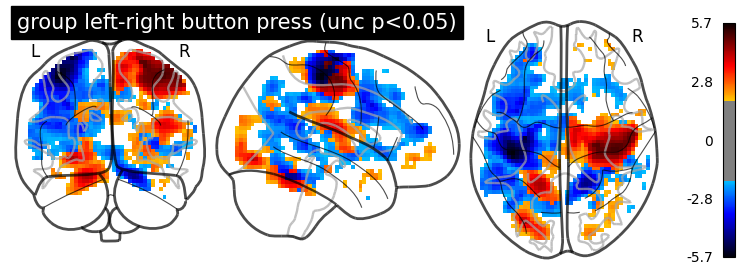

In [11]:
from nilearn.glm import threshold_stats_img

# Make a new threshold object
_, threshold = threshold_stats_img(z_map, alpha=.05, height_control='fpr')

# Print the threshold
print('Uncorrected p<0.05 threshold: %.3f' % threshold)


# Apply it to our statistic map
display = plotting.plot_glass_brain(
    z_map, threshold=threshold, colorbar=True, plot_abs=False,
    title='group left-right button press (unc p<0.05)')
plotting.show()

Oh wow! There's a lot of activation there! Can you explain why this is?

Using what you learnt in the previous notebook and the above code, try thresholding the $Z$-map first using a `Bonferroni` threshold and then using an `FDR` threshold. Make a glass brain plot for each result.

Uncorrected p<0.05 threshold: 4.880


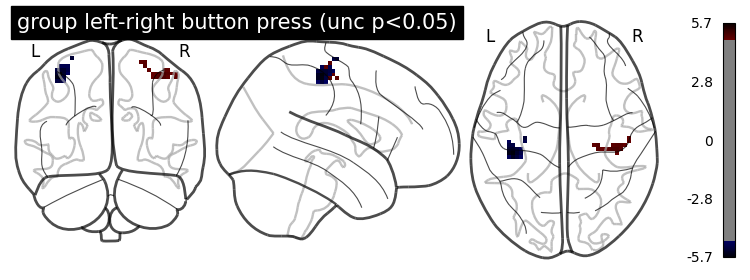

In [13]:
# Write your code here...
# Make a new threshold object
_, threshold = threshold_stats_img(z_map, alpha=.05, height_control='bonferroni')

# Print the threshold
print('Uncorrected p<0.05 threshold: %.3f' % threshold)


# Apply it to our statistic map
display = plotting.plot_glass_brain(
    z_map, threshold=threshold, colorbar=True, plot_abs=False,
    title='group left-right button press (unc p<0.05)')
plotting.show()

Which of your thresholds is more *conservative*, and why? You may have to look back at the [previous notebook](./nb_01_fmri_data_and_first_level_analysis.ipynb#Thresholding-your-Results) for help!

You might be getting sick of us asking you this at this point but it is important; Why, in practice, should you not threshold your results over and over again in this way? ([Hint](https://en.wikipedia.org/wiki/Data_dredging))

### Non-Parametric Inference

The above examples use *parametric* approaches. This means they make assumptions about the parameters of the population distribution from which the sample is drawn (e.g. they assume that $Y\sim N(X\beta,\Sigma)$). In this section, we will try something a little different; a *non-parametric* permutation test!

A permutation test is a *data-driven* way of correcting for multiple comparisons without making the same strict assumptions you would when using a parametric threshold. If you want to know more about the mechanics behind a permutation test you can check out [this paper](https://www.fil.ion.ucl.ac.uk/spm/doc/papers/NicholsHolmes.pdf) or ask one of the tutors for more details!

The permutation test controls Family Wise Error rate, which we met in the [previous notebook](./nb_01_fmri_data_and_first_level_analysis.ipynb#Thresholding-your-Results). To see why permutation testing is popular in the fMRI community, let's compare FWE-corrected results produced by permutation testing to FWE-corrected results we would obtain using the method we investigated in the previous notebook; Bonferroni.

To get started, let's make a Bonferonni-corrected $p$-value image for comparison at the $\alpha = 10\%$ significance level.

We will start by making an image of $-log_{10}(Vp^v))$, where $V$ is the number of voxels in the image.

In [18]:
import numpy as np
from nilearn.image import get_data, math_img

# Compute the p value volume
p_val = second_level_model.compute_contrast([1], output_type='p_value')

# Work out the number of vocels in the image (what's going on here? see if you can work it out)
n_voxels = np.sum(get_data(second_level_model.masker_.mask_img_))

# # Correcting the p-values for multiple testing and taking negative logarithm
neg_log_pval = math_img("-np.log10(np.minimum(1, img * " + str(n_voxels) + "))",
                        img=p_val)

<string>:1: RuntimeWarning: divide by zero encountered in log10


There's a lot going on here so let's go through this carefully.

To begin, let's talk about what the code is actually doing. In the above, we have first computed the $p$-value image in the same way we did in the previous notebook. After that we worked our $V$, the number of voxels. After this we computed an image of $-log_{10}(min(1,Vp^v))$ using the nilearn `math_img` function, which allows us to generate images using mathematic expressions.


Why have we done this? Well, let's think about what a Bonferonni correction does. A Bonferroni correction says we are only interested in the voxels, $v$, which satisfy;

$$\frac{\alpha}{V}< p^v$$

By rearranging and taking logarithms we can see that this is equivalent to:

$$-\log_{10}(\alpha) > -\log_{10}(Vp^v)$$

Okay... but why take the logarithm in the above? Taking the negative logarithm of the $p$-values might seem a bit random here, but it is purely for illustration purposes. Viewing things on a log scale allows us to see the differences between very small $p$-values a bit more clearly. You will often see $p$-value images displayed in this way in the literature.

Finally, let's talk about the minimum. Why did we add a `min` in here? Well, this is really just to trick nilearn into plotting what we want. By default, if nilearn sees negative values in an image it will apply thresholding as though we were doing a two-tailed test. This minimum simply prevents the values in the $\log_{10}$ image from taking negative values and stops nilearn from going into two-tailed mode when displaying the image.

/Users/cdtadmin/Documents/Imaging/Nilearn2022/nilearn/lib/python3.9/site-packages/nilearn/_utils/niimg.py:63: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  warn(


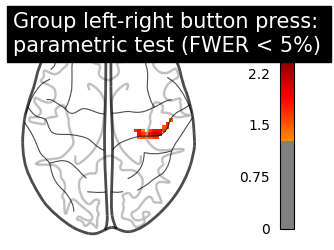

In [19]:
# Our significance level, alpha
alpha = 0.05

# Convert alpha to the -log10 scale
threshold = -np.log10(alpha)

# Title of the plot
title = ('Group left-right button press: \n'
         'parametric test (FWER < ' + str(int(100*alpha)) + '%)')

# Display the plot
display = plotting.plot_glass_brain(
    neg_log_pval, colorbar=True, display_mode='z', plot_abs=False, vmax=3,
    cut_coords=[0], threshold=threshold, title=title)
plotting.show()

Okay, so the above is just the result we would get doing the same Bonferonni correction that we met in the previous notebook (it just became a bit more convoluted because we wanted to display it in a different way).

Now let's try performing a $5\%$ multiple comparisons correction using a permutation test instead! Nilearn provides us with the `non_parametric_inference` function to achieve this.

In [20]:
from nilearn.glm.second_level import non_parametric_inference

# Get unmasked -log10 p values.
neg_log_pvals_permuted_ols_unmasked = \
    non_parametric_inference(data['cmaps'],
                             design_matrix=design_matrix,
                             model_intercept=True, n_perm=1000,
                             two_sided_test=False,
                             smoothing_fwhm=8.0, n_jobs=1)

Have a look at the [documentation](https://nilearn.github.io/modules/generated/nilearn.glm.second_level.non_parametric_inference.html) for the `non_parametric_inference` and see if you can understand what each of the above input arguments is. By doing your own research into permutation testing, try and explain why each of these arguments is needed for the permutation test. Ask one of the tutors if you still aren't sure!

Okay, finally, let's threshold our non-parametric p-values at the $5\%$ level the same way we thresholded our Bonferroni corrected $p-$values.

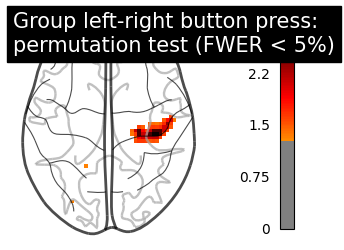

In [21]:
# Title of the plot
title = ('Group left-right button press: \n'
         'permutation test (FWER < ' + str(int(100*alpha)) + '%)')

# Display the plot
display = plotting.plot_glass_brain(
    neg_log_pvals_permuted_ols_unmasked, colorbar=True, vmax=3,
    display_mode='z', plot_abs=False, cut_coords=[0],
    threshold=threshold, title=title)
plotting.show()

The permutation testing method has given us a much less conservative region, but because of the theory behind permutation testing, it still controls the Family-Wise Error rate! This is a great result!